## Define problem

The goal of the contest is to predict the sale price of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuaration.

## Data
The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

### Note: 
The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE

## Features

In [10]:
# data dictionary :

data_dict = pd.read_excel(".\data\data dictionary.xlsx")
data_dict

,Variable,Description,Unnamed: 2
0,SalesID,unique identifier of a particular sale of a ...,NaN
1,MachineID,identifier for a particular machine; machin...,NaN
2,ModelID,identifier for a unique machine model (i.e. ...,NaN
3,datasource,source of the sale record; some sources are...,NaN
4,auctioneerID,"identifier of a particular auctioneer, i.e. ...",NaN
5,YearMade,year of manufacturer of the Machine,NaN
6,MachineHoursCurrentMeter,current usage of the machine in hours at tim...,NaN
7,UsageBand,"value (low, medium, high) calculated compari...",NaN
8,Saledate,time of sale,NaN
9,Saleprice,cost of sale in USD,NaN


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv("./data/TrainAndValid.csv", low_memory = False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [16]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

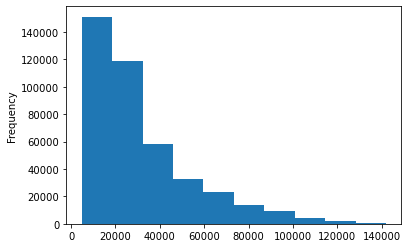

In [18]:
df["SalePrice"].plot.hist();

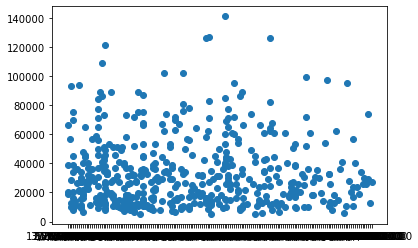

In [21]:
# plot first 500 rows of saledate vs saleprice

fig, ax = plt.subplots()
ax = plt.scatter (df["saledate"][:500], df["SalePrice"][:500]);


### we notice that this problem include date and time so we need to enrich the datetime column by informing pandas to prase it

In [24]:
df["saledate"].dtypes

dtype('O')

### we will import our data set again this time while telling pandas to prase_dates parameter for the saledate column

In [3]:
df = pd.read_csv("./data/TrainAndValid.csv", 
                 low_memory = False,
                parse_dates=["saledate"])

In [5]:
df["saledate"].dtype

dtype('<M8[ns]')

In [6]:
df.saledate[:5]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

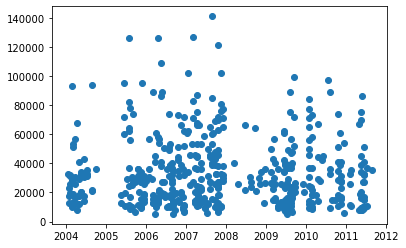

In [32]:
# lets try to plot again 
fig, ax = plt.subplots()
ax = plt.scatter (df["saledate"][:500], df["SalePrice"][:500]);

### we notice one gap during year 2005, and another small gap during 2008 

In [33]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# as there is too many columns to view we can transpose our dataframe to check all columns
df.T

,0,1,2,3,4,5,6,7,8,9,...,412688,412689,412690,412691,412692,412693,412694,412695,412696,412697
SalesID,1139246,1139248,1139249,1139251,1139253,1139255,1139256,1139261,1139272,1139275,...,6333305,6333314,6333330,6333339,6333343,6333344,6333345,6333347,6333348,6333349
SalePrice,66000,57000,10000,38500,11000,26500,21000,27000,21500,65000,...,11500,13000,20500,13000,10000,10000,10500,12500,10000,13000
MachineID,999089,117657,434808,1026470,1057373,1001274,772701,902002,1036251,1016474,...,1800259,1908162,1879923,1856845,1799614,1919201,1882122,1944213,1794518,1944743
ModelID,3157,77,7009,332,17311,4605,1937,3539,36003,3883,...,21437,21437,21446,21435,21435,21435,21436,21435,21435,21436
datasource,121,121,121,121,121,121,121,121,121,121,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,3,3,3,3,3,3,3,3,3,3,...,1,2,2,2,1,2,2,2,2,2
YearMade,2004,1996,2001,2001,2007,2004,1993,2001,2008,1000,...,2006,2006,2006,2005,2005,2005,2005,2005,2006,2006
MachineHoursCurrentMeter,68,4640,2838,3486,722,508,11540,4883,302,20700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,Low,Low,High,High,Medium,Low,High,High,Low,Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00,2008-12-18 00:00:00,2004-08-26 00:00:00,2005-11-17 00:00:00,2009-08-27 00:00:00,2007-08-09 00:00:00,...,2012-02-13 00:00:00,2012-01-28 00:00:00,2012-01-28 00:00:00,2012-01-28 00:00:00,2012-02-13 00:00:00,2012-03-07 00:00:00,2012-01-28 00:00:00,2012-01-28 00:00:00,2012-03-07 00:00:00,2012-01-28 00:00:00


In [7]:
# create a copy of the dataframe

df_tmp = df

In [8]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Lets try sorting our data asending and desending by the price
df.sort_values(by = "SalePrice", inplace = True, ascending = True)


In [10]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
259004,1792314,4750.0,1260035,9548,132,99.0,1988,NaN,NaN,1996-10-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21519,1213615,4750.0,1020115,6633,121,3.0,1998,5084.0,Medium,2011-03-25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258852,1792003,4750.0,1258666,9533,132,2.0,1989,NaN,NaN,2006-03-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270983,1809845,4750.0,1141836,9518,132,1.0,2004,701.0,Low,2008-12-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377304,2758646,4750.0,1798889,12340,149,15.0,1990,0.0,NaN,2010-06-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df.tail(20)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
12097,1178900,140000.0,652092,23937,121,3.0,2005,4802.0,High,2008-07-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394499,6268649,140000.0,1939218,3372,149,1.0,1997,NaN,NaN,2011-12-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
322296,2308981,141000.0,1782037,3363,136,NaN,2004,0.0,NaN,2008-06-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11201,1175774,141000.0,53603,23926,121,3.0,2002,2442.0,Medium,2005-06-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5381,1157345,141000.0,273762,23931,121,3.0,2001,4811.0,Medium,2006-05-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395395,6274735,141000.0,68590,23931,149,2.0,2007,NaN,NaN,2011-10-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367102,2569311,141000.0,533093,23926,149,4.0,2007,0.0,NaN,2011-02-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154663,1539846,141000.0,895204,23931,132,8.0,2006,NaN,NaN,2011-07-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,1140442,141000.0,563007,23937,121,3.0,2000,7990.0,Medium,2007-08-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6667,1161700,141000.0,104352,23926,121,3.0,2007,943.0,Low,2010-02-25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Lets sort th dataframe by saledate ascending 
# (THIS IS RECOMMENDED PRACTICE FOR ANY DATETIME PROBLEMS)

df.sort_values(by = "saledate", inplace = True, ascending = True)
df.head(20)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
135376,1493279,63000.0,1363756,2759,132,99.0,1987,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
119449,1460475,120000.0,1469147,4140,132,99.0,1987,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Semi U,None or Unspecified,NaN,NaN
115957,1453139,37000.0,1456099,3854,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
53101,1298915,49000.0,1338785,4124,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Angle,None or Unspecified,NaN,NaN
119199,1460065,13500.0,1092933,7428,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
205752,1646995,10500.0,1044876,8443,132,99.0,1973,NaN,NaN,1989-01-31,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Triple,NaN,NaN,NaN,NaN,NaN
127300,1475263,20000.0,1441275,7277,132,99.0,1970,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
82165,1380746,81000.0,805541,4128,132,99.0,1987,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Semi U,None or Unspecified,NaN,NaN
98567,1415950,40000.0,1142272,3357,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After changing "saledate" to datetime64 we can use datetime attributes to get more data out of it 

In [12]:
# lets add a seprate column for the year / month / day / day of week / day of year for our sales df
df_tmp["year"] = df_tmp.saledate.dt.year
df_tmp["month"] = df_tmp.saledate.dt.month
df_tmp["day"] = df_tmp.saledate.dt.day
df_tmp["dayofweek"] = df_tmp.saledate.dt.dayofweek
df_tmp["dayofyear"] = df_tmp.saledate.dt.dayofyear


In [13]:
df_tmp.head().T

,205615,135376,119449,115957,53101
SalesID,1646770,1493279,1460475,1453139,1298915
SalePrice,9500,63000,120000,37000,49000
MachineID,1126363,1363756,1469147,1456099,1338785
ModelID,8434,2759,4140,3854,4124
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1987,1987,1978,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [49]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,year,month,day,dayofweek,dayofyear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
135376,1493279,63000.0,1363756,2759,132,99.0,1987,NaN,NaN,1989-01-31,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,1989,1,31,1,31
119449,1460475,120000.0,1469147,4140,132,99.0,1987,NaN,NaN,1989-01-31,...,None or Unspecified,Semi U,None or Unspecified,NaN,NaN,1989,1,31,1,31
115957,1453139,37000.0,1456099,3854,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
53101,1298915,49000.0,1338785,4124,132,99.0,1984,NaN,NaN,1989-01-31,...,None or Unspecified,Angle,None or Unspecified,NaN,NaN,1989,1,31,1,31


In [14]:
# now we can drop the "saledate" column from the df
df_tmp.drop("saledate", axis = 1, inplace = True)

In [15]:
# check "saledate" is dropped
df_tmp.T

,205615,135376,119449,115957,53101,119199,205752,127300,82165,98567,...,406092,411423,410879,411695,406109,409202,407382,408976,409780,412164
SalesID,1646770,1493279,1460475,1453139,1298915,1460065,1646995,1475263,1380746,1415950,...,6258697,6309986,6302984,6311321,6258767,6283634,6267915,6282337,6286207,6318085
SalePrice,9500,63000,120000,37000,49000,13500,10500,20000,81000,40000,...,31000,16000,16000,13000,27000,35000,47000,7500,25000,5500
MachineID,1126363,1363756,1469147,1456099,1338785,1092933,1044876,1441275,805541,1142272,...,1907659,1899882,1915521,1823846,1797080,1930870,1844076,1928688,1848914,1873607
ModelID,8434,2759,4140,3854,4124,7428,8443,7277,4128,3357,...,3239,9508,5266,17311,3172,4701,3362,22072,4605,10402
datasource,132,132,132,132,132,132,132,132,132,132,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,18,99,99,99,99,99,99,99,99,99,...,99,99,99,99,99,99,99,99,99,99
YearMade,1974,1987,1987,1978,1984,1978,1973,1970,1987,1978,...,2001,2005,2001,2005,2004,1998,1977,2005,2004,2001
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,D5HII,D7H,966C,D6D,D3,40,950,D6H,12G,...,850H,331,D38E,S175,580M,544H,140G,317,310G,1300


In [16]:
# lets check the value counts for "state"
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

### if we try to fit any regression model we will get errors due to string values and empty (na) values 

### lets work on changing the string values to pandas category 


In [17]:
# first lets check how many string objects we have in our dataframe using a for loop 
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [19]:
# we can use the same for loop to change from string to pandas category
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [21]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 412164
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [23]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [26]:
df_tmp.state.cat.codes

205615    43
135376     8
119449     8
115957     8
53101      8
          ..
409202     4
407382     4
408976     4
409780     4
412164     4
Length: 412698, dtype: int8

In [25]:
# percentage of null values in each column 
(df_tmp.isna().sum()/len(df_tmp)) * 100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

### Save processed data up till now 

In [28]:
df_tmp.to_csv ("data\halfway_bulldozers.csv", index = False)

In [2]:
df_tmp = pd.read_csv ("data/halfway_bulldozers.csv", low_memory = False, error_bad_lines = False)

In [5]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1493279,1460475,1453139,1298915
SalePrice,9500,63000,120000,37000,49000
MachineID,1126363,1363756,1469147,1456099,1338785
ModelID,8434,2759,4140,3854,4124
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1987,1987,1978,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,D5HII,D7H,966C,D6D


In [3]:
# check null in numerical columns 
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [4]:
# fill null with median value (notice we will create a binary column to identify which rows were containing empt data )
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # binary columns 
            df_tmp[label + " is_missing"] = pd.isnull(content)
            # fill missing date with median
            df_tmp[label] = content.fillna(content.median())
        

In [8]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1493279,1460475,1453139,1298915
SalePrice,9500,63000,120000,37000,49000
MachineID,1126363,1363756,1469147,1456099,1338785
ModelID,8434,2759,4140,3854,4124
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1987,1987,1978,1984
MachineHoursCurrentMeter,0,0,0,0,0
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,D5HII,D7H,966C,D6D


In [5]:
# check non numerical data
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print (label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [6]:
# check null items in non numeric columns 
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull (content).sum():
            print (label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [7]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # create binary columns 
        df_tmp[label +" is_missing"] = pd.isnull(content)
        # fill missing data with codes +1 
        df_tmp[label] = pd.Categorical(content).codes +1
    

we added +1 as all missing values is the (pd category) get the -1 values in the codes so we +1 to keep the value 0 

In [12]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1493279,1460475,1453139,1298915
SalePrice,9500,63000,120000,37000,49000
MachineID,1126363,1363756,1469147,1456099,1338785
ModelID,8434,2759,4140,3854,4124
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting is_missing,False,False,False,True,False
Blade_Type is_missing,False,False,False,True,False
Travel_Controls is_missing,False,False,False,True,False
Differential_Type is_missing,True,True,True,False,True


In [13]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting is_missing     0
Blade_Type is_missing           0
Travel_Controls is_missing      0
Differential_Type is_missing    0
Steering_Controls is_missing    0
Length: 103, dtype: int64

Now all dataframe values are numeric and we filled a missing data we can fit in our model

In [8]:
# use randomforestregressor model

from sklearn.ensemble import RandomForestRegressor


In [13]:
%%time
model = RandomForestRegressor(n_estimators = 10,
                              n_jobs =-1,
                              random_state = 99)
model.fit(df_tmp.drop("SalePrice", axis = 1)[:100000], df_tmp["SalePrice"][:100000])

Wall time: 9.37 s


RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=99)

In [14]:
model.score(df_tmp.drop("SalePrice", axis = 1)[:100000], df_tmp["SalePrice"][:100000])

0.9817786355614345

### Note that we scored our model againest the same training set, so the score needs to be validated on validation set 

we will split data set by dates as per problem instruction, we can use the already divided sets available but we will split it by hand 

In [16]:
df_tmp.year.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: year, dtype: int64

In [9]:
df_valid = df_tmp[df_tmp["year"]==2012]

In [11]:
df_train.shape

(401125, 103)

In [10]:
df_train = df_tmp[df_tmp["year"] != 2012]

In [12]:
df_valid.shape

(11573, 103)

In [13]:
# split our X, y
X_train, y_train = df_train.drop("SalePrice", axis = 1), df_train["SalePrice"]
X_valid, y_valid = df_valid.drop("SalePrice", axis = 1), df_valid["SalePrice"]

In [14]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((401125, 102), (11573, 102), (401125,), (11573,))

### build an evaulation function as per competition requirements 

In [15]:
# define Root Mean Squared Log Error 
# Import Mean squared log error from sklearn
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
def rmsle (y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))


def model_scores (model):
    train_preds = model.predict (X_train)
    valid_preds = model.predict (X_valid)
    scores = {"Train MAE" : mean_absolute_error(y_train, train_preds),
              "Valid MAE" : mean_absolute_error(y_valid, valid_preds),
              "Train RMSLE" : rmsle(y_train, train_preds),
              "Valid RMSLE" : rmsle(y_valid, valid_preds),
              "Train R2 Score" : r2_score(y_train, train_preds),
              "Valid R2 Score" : r2_score(y_valid, valid_preds)}
    return scores


In [23]:
# instantiate model and setting up max_sampled to minimize training time 

model = RandomForestRegressor(n_jobs = -1,
                              random_state = 99,
                              max_samples = 15000)

In [24]:
%%time 
model.fit(X_train, y_train)

Wall time: 26 s


RandomForestRegressor(max_samples=15000, n_jobs=-1, random_state=99)

In [25]:
model_scores(model)

{'Train MAE': 5249.805443041445,
 'Valid MAE': 6891.443923788128,
 'Train RMSLE': 0.245215571157665,
 'Valid RMSLE': 0.282575842866941,
 'Train R2 Score': 0.8743668554010973,
 'Valid R2 Score': 0.8445740915066363}

In [18]:
%%time
# setup Randomized search CV to hyperprameters tune model
from sklearn.model_selection import RandomizedSearchCV
# create our prameters grids
rs_grid = {"n_estimators" : np.arange(10, 100, 10),
           "max_depth" : [None, 1, 3, 5],
           "min_samples_split" : np.arange (1, 20, 2),
           "min_samples_leaf" : np.arange(2, 20, 2),
           "max_features" : ["auto", "sqrt", 1, 2],
           "max_samples" : [10000]}
rs_model = RandomizedSearchCV(estimator = RandomForestRegressor(n_jobs=-1, 
                                                                random_state=99),
                              param_distributions = rs_grid,
                              n_iter = 2,
                              cv = 5,
                              verbose = True)
# fit model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   39.2s finished


Wall time: 42.5 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=99),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 1, 3, 5],
                                        'max_features': ['auto', 'sqrt', 1, 2],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [19]:
rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 19,
 'min_samples_leaf': 10,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': None}

In [20]:
model_scores(rs_model)

{'Train MAE': 8279.22596443613,
 'Valid MAE': 9817.76250402484,
 'Train RMSLE': 0.36427075565058253,
 'Valid RMSLE': 0.39077753626963685,
 'Train R2 Score': 0.720818725785531,
 'Valid R2 Score': 0.7166447893970984}

In [23]:
%%time
# fit ideal model (Best parameters were optained y using 100 iteration on rnadmoied search cv)
ideal_model = RandomForestRegressor(n_estimators = 40,
                                    min_samples_split = 14,
                                    min_samples_leaf = 1,
                                    max_features = 0.5,
                                    max_samples = None,
                                    random_state = 99,
                                    n_jobs = -1)

# fit ideal model on complete data set
ideal_model.fit (X_train, y_train)

Wall time: 1min 25s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=99)

In [24]:
model_scores(ideal_model)

{'Train MAE': 2954.024740280088,
 'Valid MAE': 5966.343015290606,
 'Train RMSLE': 0.1447365072269535,
 'Valid RMSLE': 0.24612856722568882,
 'Train R2 Score': 0.9588227414073661,
 'Valid R2 Score': 0.8817587175495039}

In [59]:
### import test data and create preprocessing function 

df_test = pd.read_csv("data/Test.csv",
                      low_memory = False,
                      parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [65]:
# create preprocessing function to ensure our test data frame is in the same formate as our training dataframe
def preprocess (df):
    """
    transform df to same formate as training df
    """
    # create Year/month/day/dayofweek/dayofyear columns and drop saledate column
    df["year"] = df.saledate.dt.year
    df["month"] = df.saledate.dt.month
    df["day"] = df.saledate.dt.day
    df["dayofweek"] = df.saledate.dt.dayofweek
    df["dayofyear"] = df.saledate.dt.dayofyear
    df.drop("saledate", axis = 1, inplace = True)
    # find numeric values and fill missing numeric value columns with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label + " is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
        # find non numeric values and change to pd Categorical.codes         
        if not pd.api.types.is_numeric_dtype(content):
            df[label + " is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes +1
            
    return df
            

In [66]:
df_test = preprocess(df_test)
df_test.head()

AttributeError: 'DataFrame' object has no attribute 'saledate'

In [67]:
# Notice that the columns count is 101 but our training data had 102 
# Compare both dataframes to find the missing columns 
df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width is_missing', 'Stick_Length is_missing',
       'Thumb is_missing', 'Pattern_Changer is_missing',
       'Grouser_Type is_missing', 'Backhoe_Mounting is_missing',
       'Blade_Type is_missing', 'Travel_Controls is_missing',
       'Differential_Type is_missing', 'Steering_Controls is_missing'],
      dtype='object', length=101)

In [68]:
X_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width is_missing', 'Stick_Length is_missing',
       'Thumb is_missing', 'Pattern_Changer is_missing',
       'Grouser_Type is_missing', 'Backhoe_Mounting is_missing',
       'Blade_Type is_missing', 'Travel_Controls is_missing',
       'Differential_Type is_missing', 'Steering_Controls is_missing'],
      dtype='object', length=102)

In [69]:
# turn both to sets to find the missing column
miss_columns  =set(X_train.columns) - set(df_test.columns)
miss_columns

{'auctioneerID is_missing'}

In [70]:
for i in (X_train.columns):
    if i not in (df_test.columns):
        print (i)

auctioneerID is_missing


In [71]:
df_test["auctioneerID is_missing"] = False

In [72]:
df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Stick_Length is_missing', 'Thumb is_missing',
       'Pattern_Changer is_missing', 'Grouser_Type is_missing',
       'Backhoe_Mounting is_missing', 'Blade_Type is_missing',
       'Travel_Controls is_missing', 'Differential_Type is_missing',
       'Steering_Controls is_missing', 'auctioneerID is_missing'],
      dtype='object', length=102)

In [73]:
# fit ideal model

ideal_preds = ideal_model.predict(df_test)

In [74]:
ideal_preds

array([20426.49048116, 21127.33450171, 48592.96180202, ...,
       16650.96603374, 19683.95002341, 27783.51557916])

In [77]:
# formate results as per kaggle requirements 
df_ideal = pd.DataFrame()
df_ideal["SalesID"] = df_test["SalesID"]
df_ideal["SalePrice"] = ideal_preds
df_ideal.head()

,SalesID,SalePrice
0,1227829,20426.490481
1,1227844,21127.334502
2,1227847,48592.961802
3,1227848,64654.666942
4,1227863,48840.533641


In [78]:
df_ideal.to_csv("data/final_preds.csv", index = False)

In [79]:
# Features Importance
ideal_model.feature_importances_

array([3.36274737e-02, 1.83919068e-02, 4.67915856e-02, 1.78701654e-03,
       3.29069693e-03, 2.02136133e-01, 3.07472891e-03, 9.89949678e-04,
       4.43214773e-02, 4.91217645e-02, 6.01800101e-02, 4.50278557e-03,
       1.29660564e-02, 1.60118983e-01, 4.30632302e-02, 5.96110319e-03,
       2.73597751e-03, 3.02460533e-03, 3.83327370e-03, 7.07023699e-02,
       5.20753463e-04, 1.08372587e-04, 1.27926309e-03, 1.78417372e-04,
       9.10956157e-04, 2.43094344e-05, 2.64353625e-04, 6.14447409e-03,
       2.28006423e-04, 6.48012968e-05, 3.54053132e-03, 1.43983043e-03,
       3.42095944e-03, 1.04331371e-03, 2.61863541e-04, 6.28778357e-03,
       8.81886542e-04, 1.38406871e-02, 7.96870754e-04, 1.78250299e-03,
       1.43810626e-03, 8.77597814e-04, 3.93668936e-03, 5.77853903e-04,
       5.37051747e-04, 3.40024185e-04, 3.51655593e-04, 2.78958554e-03,
       7.21381677e-04, 2.52684564e-04, 2.55577240e-04, 7.37606217e-02,
       3.76686651e-03, 5.66497087e-03, 2.90079348e-03, 9.95152162e-03,
      

In [88]:
# plot features importances
def plot_imp_feat (columns, importances, n =20):
    df = (pd.DataFrame({"Features" : columns,
                        "Features Importances" : importances})
         .sort_values("Features Importances", ascending =False)
         .reset_index(drop = True))
    
    fig, ax = plt.subplots()
    ax.barh (df["Features"][:n], df["Features Importances"][:20])
    ax.ylabel = "Features"
    ax.xlabel = "Features Importances"
    ax.invert_yaxis()

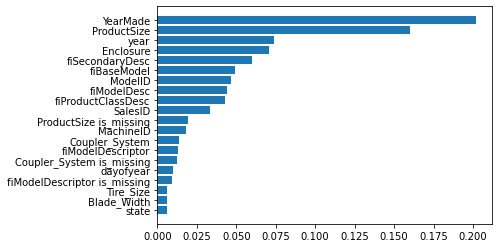

In [89]:
plot_imp_feat(X_train.columns, ideal_model.feature_importances_);

In [91]:
X_train.YearMade.value_counts()

1000    38185
1998    21221
2005    20587
2004    20020
1997    18905
        ...  
1949        1
1947        1
1942        1
1937        1
2013        1
Name: YearMade, Length: 72, dtype: int64

In [4]:
df.ProductSize.value_counts()

Medium            64342
Large / Medium    51297
Small             27057
Mini              25721
Large             21396
Compact            6280
Name: ProductSize, dtype: int64